In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('toppick_records3.csv')

# Exploratory Data Analysis

In [46]:
df.describe()

,Unnamed: 0,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PF,PTS,dummy,SOS,NBAGP,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
count,1476.000000,1.0,1476.000000,1253.000000,1465.000000,1476.000000,1475.000000,1475.000000,1371.000000,1369.000000,...,1332.000000,1465.000000,131.000000,1386.000000,1475.000000,1475.000000,1475.000000,1475.000000,1344.000000,1344.000000
mean,737.500000,1.5,94.043699,65.486832,28.970034,5.058469,10.264136,0.497841,4.236178,8.046603,...,2.309234,13.053010,54.465649,6.368023,44.113492,2.436814,1.196339,1.045898,0.325298,5.789137
std,426.228812,NaN,34.595948,33.091979,4.911406,1.450009,3.050824,0.057531,1.531472,2.770976,...,0.518317,4.764043,25.692950,3.683244,27.530339,1.960168,1.405190,2.257868,0.395996,4.347408
min,0.000000,1.5,2.500000,0.000000,0.000000,1.200000,2.100000,0.348000,0.600000,1.200000,...,0.600000,-10.730000,1.000000,-10.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.750000,1.5,66.000000,35.000000,26.200000,4.100000,8.200000,0.453000,3.100000,5.900000,...,2.000000,10.200000,37.000000,4.700000,19.000000,1.000000,0.300000,0.300000,0.100000,2.700000
50%,737.500000,1.5,102.000000,64.000000,29.600000,5.000000,10.100000,0.491000,4.000000,7.800000,...,2.300000,13.300000,62.000000,7.485000,47.000000,1.900000,0.700000,0.500000,0.200000,4.500000
75%,1106.250000,1.5,124.000000,91.000000,32.600000,5.900000,12.250000,0.539500,5.200000,9.700000,...,2.700000,16.100000,78.000000,8.770000,70.000000,3.300000,1.500000,0.800000,0.400000,7.900000
max,1475.000000,1.5,152.000000,147.000000,39.200000,10.400000,22.700000,0.694000,9.700000,17.900000,...,4.100000,29.000000,82.000000,12.750000,82.000000,13.900000,10.600000,28.200000,3.500000,23.500000


#### All columns after column 20 are in wrong position hence they are shifted to correct place after row 1346

In [47]:
df.iloc[1346:][list(df.columns)[20:]]=df.iloc[1346:][list(df.columns)[20:]].shift(periods=2, axis=1)

/Users/namitagrawal/Desktop/NBA_Analysis/env/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Looks like their are a couple of columns that are not needed

In [48]:
df.describe()

,Unnamed: 0,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PF,PTS,dummy,SOS,NBAGP,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
count,1476.000000,1.0,1476.000000,1253.000000,1465.000000,1476.000000,1475.000000,1475.000000,1371.000000,1369.000000,...,1457.000000,1475.000000,2.000000,1376.000000,1475.000000,1475.000000,1475.000000,1475.000000,1473.000000,1473.000000
mean,737.500000,1.5,94.043699,65.486832,28.970034,5.058469,10.264136,0.497841,4.236178,8.046603,...,2.339533,13.890163,44.500000,6.504833,48.767729,2.655322,1.286034,0.524068,0.329871,5.853971
std,426.228812,NaN,34.595948,33.091979,4.911406,1.450009,3.050824,0.057531,1.531472,2.770976,...,0.523659,3.986992,53.033009,3.711088,25.343025,1.998409,1.432884,0.423027,0.406908,4.398168
min,0.000000,1.5,2.500000,0.000000,0.000000,1.200000,2.100000,0.348000,0.600000,1.200000,...,0.600000,3.000000,7.000000,-10.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.750000,1.5,66.000000,35.000000,26.200000,4.100000,8.200000,0.453000,3.100000,5.900000,...,2.000000,11.250000,25.750000,5.305000,27.000000,1.200000,0.400000,0.200000,0.100000,2.700000
50%,737.500000,1.5,102.000000,64.000000,29.600000,5.000000,10.100000,0.491000,4.000000,7.800000,...,2.300000,13.800000,44.500000,7.560000,52.000000,2.100000,0.800000,0.400000,0.200000,4.500000
75%,1106.250000,1.5,124.000000,91.000000,32.600000,5.900000,12.250000,0.539500,5.200000,9.700000,...,2.700000,16.500000,63.250000,8.802500,72.000000,3.500000,1.600000,0.700000,0.400000,8.000000
max,1475.000000,1.5,152.000000,147.000000,39.200000,10.400000,22.700000,0.694000,9.700000,17.900000,...,4.100000,29.000000,82.000000,12.750000,82.000000,13.900000,10.600000,4.100000,3.500000,28.200000


#### Getting rid datapoints that have null labels as they can't be used for training

In [49]:
df[(df['NBAPTS'].isnull()) | (df['NBATRB'].isnull()) | (df['NBAAST'].isnull()) | (df['NBASTL'].isnull()) | (df['NBABLK'].isnull()) ]

,Unnamed: 0,playerName,Pos,School,Conf,G,GS,MP,FG,FGA,...,PF,PTS,dummy,SOS,NBAGP,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
1295,1295,Orlando Graham,PF,West Texas A&M,NaN,51.0,26.0,30.6,4.7,9.4,...,NaN,3.29,7.0,1.6,0.0,0.0,0.0,1.1,NaN,NaN
1312,1312,Olden Polynice,C,Virginia,NaN,95.0,84.0,31.9,4.7,8.1,...,NaN,9.20,82.0,4.0,0.4,0.4,0.3,4.1,NaN,NaN
1414,1414,Terry Porter,PG,79,1.5,2.5,1.0,0.0,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.drop([1295,1312,1414], inplace=True)

In [51]:
df.drop(['Unnamed: 0', 'dummy'], axis=1, inplace=True)

#### Create a dataframe for nba data

In [52]:
rookie_data = df[['NBAGP', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS']]

In [53]:
rookie_data

,NBAGP,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,71.0,10.3,1.8,0.9,0.9,16.3
1,62.0,7.6,1.0,0.5,1.0,14.9
2,58.0,4.7,1.1,0.9,1.4,13.8
3,81.0,3.7,8.1,0.9,0.2,19.1
4,47.0,5.0,0.8,0.3,1.4,6.2
...,...,...,...,...,...,...
1471,39.0,0.9,0.7,0.1,0.1,3.3
1472,66.0,2.0,0.4,0.2,0.2,3.8
1473,21.0,1.8,0.4,0.3,0.0,2.9
1474,60.0,2.5,0.5,0.2,0.5,3.2


In [54]:
df.drop(['School', 'Conf', 'NBAGP', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'], axis=1, inplace=True)

#### Dataset looks a lot cleaner now

In [55]:
df

,playerName,Pos,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Deandre Ayton,C,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,...,3.4,8.2,11.6,1.6,0.6,1.9,2.0,2.3,20.1,6.84
1,Marvin Bagley III,PF,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,...,4.0,7.1,11.1,1.5,0.8,0.9,2.3,1.8,21.0,9.71
2,Jaren Jackson Jr.,PF,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,...,1.5,4.3,5.8,1.1,0.6,3.0,1.8,3.2,10.9,7.10
3,Trae Young,PG,32.0,32.0,35.4,8.2,19.3,0.422,4.5,9.1,...,0.4,3.5,3.9,8.7,1.7,0.3,5.2,1.8,27.4,10.56
4,Mo Bamba,C,30.0,29.0,30.2,4.9,9.0,0.541,4.4,7.3,...,3.2,7.3,10.5,0.5,0.8,3.7,1.5,2.5,12.9,10.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,Willie White,SG,122.0,119.0,33.7,6.5,12.8,0.509,5.6,11.4,...,NaN,NaN,4.1,2.3,1.6,0.2,2.5,2.0,16.2,-2.57
1472,Gary Plummer,PF,90.0,50.0,24.5,4.9,10.1,0.487,NaN,NaN,...,NaN,NaN,6.7,1.3,0.8,0.8,2.4,3.1,12.5,-5.02
1473,Ben McDonald,SF,114.0,57.0,33.9,5.6,10.7,0.523,NaN,NaN,...,NaN,NaN,5.9,3.7,1.1,0.1,2.7,3.0,13.3,1.62
1474,Jim Petersen,PF,96.0,NaN,18.5,2.4,4.2,0.575,NaN,NaN,...,NaN,NaN,4.0,1.0,0.3,0.8,1.6,2.4,5.6,7.04


#### Create one-hot encoded vectors for position as its plays a role in numbers put up by a player

In [56]:
df['Pos'].value_counts()

SG       319
PF       319
PG       293
SF       274
C        257
PF-SF      4
SF-PF      2
SF-SG      1
C-PF       1
SG-PG      1
SG-SF      1
PF-C       1
Name: Pos, dtype: int64

#### From the grouping above, it looks like we can roll PF-SF through SG-SF into the main positions since they have low frequencies

In [57]:
pos = pd.get_dummies(df['Pos'])
pos['C'] = pos['C']+pos['C-PF']
pos['PForward'] = pos['PF']+pos['PF-C']+pos['PF-SF']
pos['SF'] = pos['SF']+pos['SF-PF']+pos['SF-SG']
pos['SG'] = pos['SG']+pos['SG-PG']+pos['SG-SF']

In [58]:
df = pd.concat([df,pos], axis=1)

In [59]:
df.drop(['Pos','C-PF', 'PF-C', 'PF-SF', 'SF-PF', 'SF-SG', 'SG-PG', 'SG-SF'], axis=1, inplace=True)

In [60]:
df

,playerName,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,TOV,PF,PTS,SOS,C,PF,PG,SF,SG,PForward
0,Deandre Ayton,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,...,2.0,2.3,20.1,6.84,1,0,0,0,0,0
1,Marvin Bagley III,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,...,2.3,1.8,21.0,9.71,0,1,0,0,0,1
2,Jaren Jackson Jr.,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,...,1.8,3.2,10.9,7.10,0,1,0,0,0,1
3,Trae Young,32.0,32.0,35.4,8.2,19.3,0.422,4.5,9.1,0.493,...,5.2,1.8,27.4,10.56,0,0,1,0,0,0
4,Mo Bamba,30.0,29.0,30.2,4.9,9.0,0.541,4.4,7.3,0.603,...,1.5,2.5,12.9,10.67,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,Willie White,122.0,119.0,33.7,6.5,12.8,0.509,5.6,11.4,0.491,...,2.5,2.0,16.2,-2.57,0,0,0,0,1,0
1472,Gary Plummer,90.0,50.0,24.5,4.9,10.1,0.487,NaN,NaN,NaN,...,2.4,3.1,12.5,-5.02,0,1,0,0,0,1
1473,Ben McDonald,114.0,57.0,33.9,5.6,10.7,0.523,NaN,NaN,NaN,...,2.7,3.0,13.3,1.62,0,0,0,1,0,0
1474,Jim Petersen,96.0,NaN,18.5,2.4,4.2,0.575,NaN,NaN,NaN,...,1.6,2.4,5.6,7.04,0,1,0,0,0,1


## Visualizations

##### Looks like some of the features and labels do not follow a normal distribution as seen by the histograms below. Depending on the models that are used, many of these columns will need to be scaled such that we can get the most predictive power

array([[<AxesSubplot:title={'center':'NBAGP'}>,
        <AxesSubplot:title={'center':'NBATRB'}>],
       [<AxesSubplot:title={'center':'NBAAST'}>,
        <AxesSubplot:title={'center':'NBASTL'}>],
       [<AxesSubplot:title={'center':'NBABLK'}>,
        <AxesSubplot:title={'center':'NBAPTS'}>]], dtype=object)

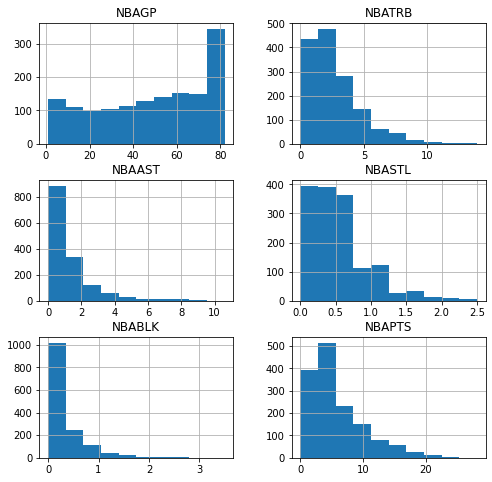

In [61]:
rookie_data.hist(figsize=(8,8))


In [62]:
df.columns = ['playerName', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%',
       '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SOS', 'C', 'PFdrop', 'PG', 'SF', 'SG',
       'PForward']
df.drop(['PFdrop'], axis = 1, inplace=True)

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>],
       [<AxesSubplot:title={'center':'FG%'}>,
        <AxesSubplot:title={'center':'2P'}>,
        <AxesSubplot:title={'center':'2PA'}>,
        <AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'3P'}>],
       [<AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'FT'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'ORB'}>,
        <AxesSubplot:title={'center':'DRB'}>,
        <AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'

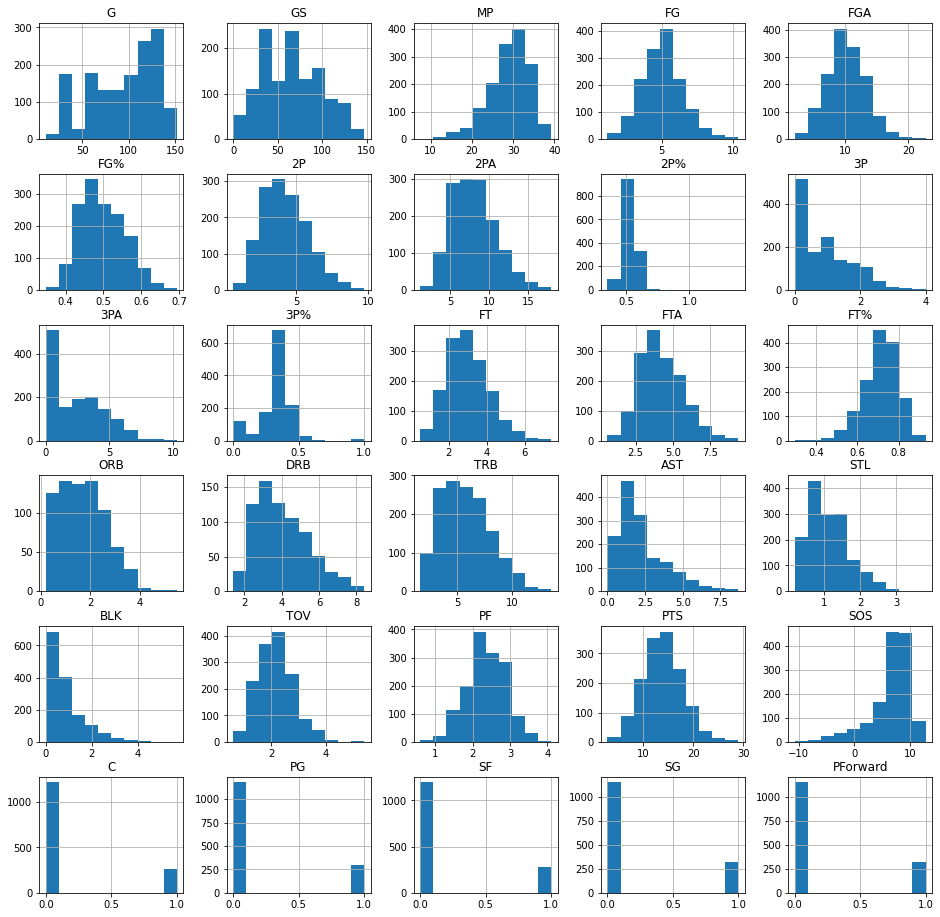

In [63]:
df.hist(figsize=(16, 16))

In [64]:
college_plus_nba = pd.concat([df, rookie_data], axis = 1)


#### From this heatmap, it looks like the college counterpart stat does correlate somewhat to its NBA counterpart stat (i.e AST to NBAAST). Its interesting to see that PG correlates to NBAAST which is something one would expect.

<AxesSubplot:>

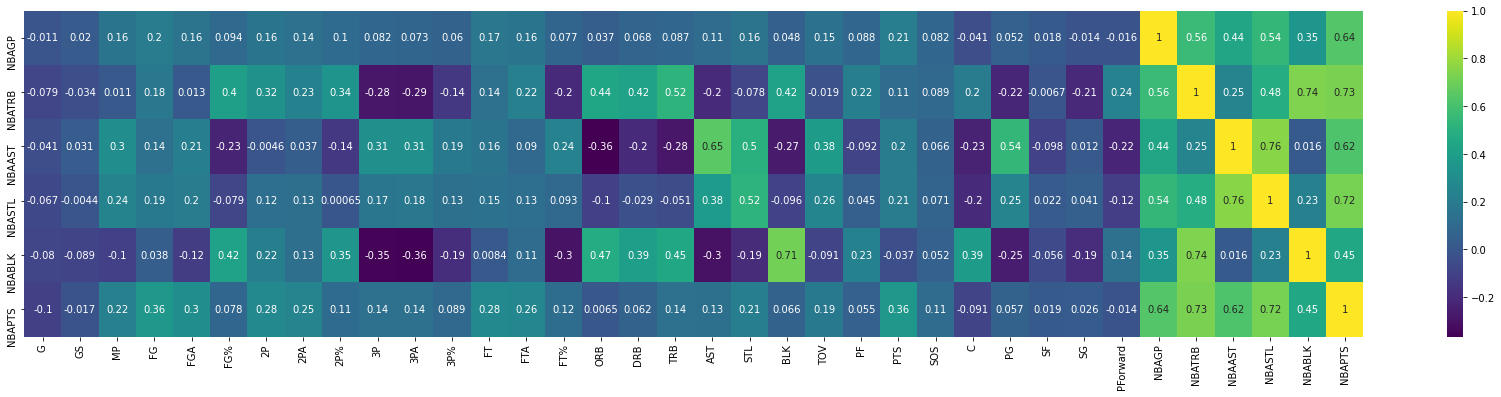

In [65]:
plt.figure(figsize=(30,6))
sns.heatmap(college_plus_nba.corr().iloc[-6:], annot=True, cmap='viridis')

#### ORB, DRB and GS have alot of null values.

<AxesSubplot:>

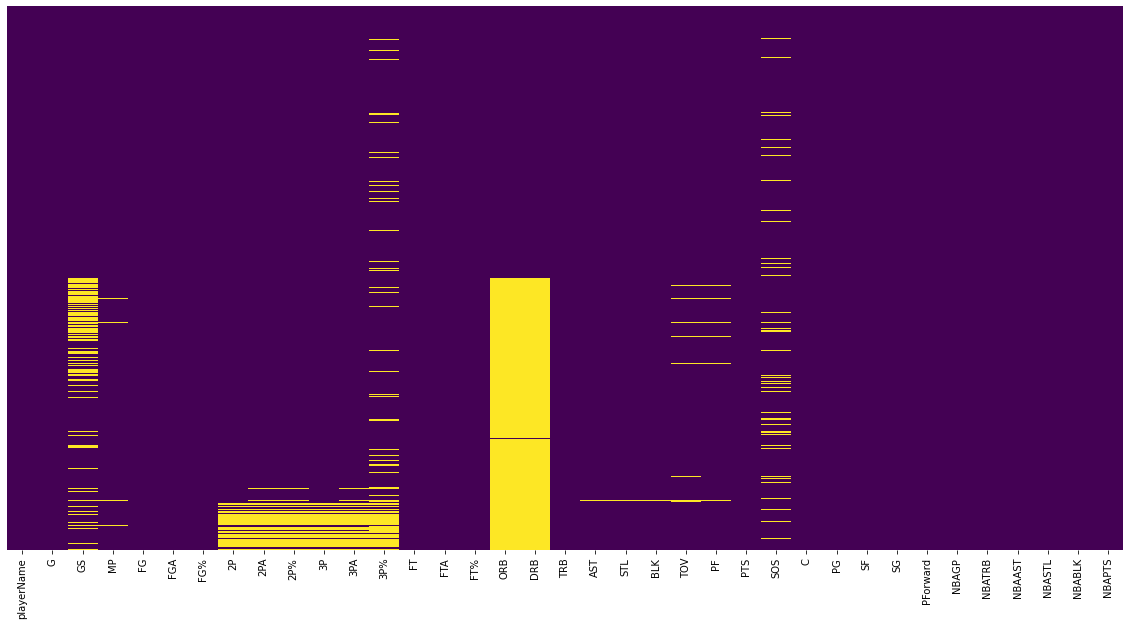

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(college_plus_nba.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### drop ORB and DRB since we have TRB

In [67]:
df.drop(['DRB','ORB'], axis=1, inplace=True)

In [68]:
df

,playerName,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,BLK,TOV,PF,PTS,SOS,C,PG,SF,SG,PForward
0,Deandre Ayton,35.0,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,...,1.9,2.0,2.3,20.1,6.84,1,0,0,0,0
1,Marvin Bagley III,33.0,32.0,33.9,8.2,13.3,0.614,7.5,11.6,0.647,...,0.9,2.3,1.8,21.0,9.71,0,0,0,0,1
2,Jaren Jackson Jr.,35.0,34.0,21.8,3.4,6.6,0.513,2.3,3.9,0.596,...,3.0,1.8,3.2,10.9,7.10,0,0,0,0,1
3,Trae Young,32.0,32.0,35.4,8.2,19.3,0.422,4.5,9.1,0.493,...,0.3,5.2,1.8,27.4,10.56,0,1,0,0,0
4,Mo Bamba,30.0,29.0,30.2,4.9,9.0,0.541,4.4,7.3,0.603,...,3.7,1.5,2.5,12.9,10.67,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,Willie White,122.0,119.0,33.7,6.5,12.8,0.509,5.6,11.4,0.491,...,0.2,2.5,2.0,16.2,-2.57,0,0,0,1,0
1472,Gary Plummer,90.0,50.0,24.5,4.9,10.1,0.487,NaN,NaN,NaN,...,0.8,2.4,3.1,12.5,-5.02,0,0,0,0,1
1473,Ben McDonald,114.0,57.0,33.9,5.6,10.7,0.523,NaN,NaN,NaN,...,0.1,2.7,3.0,13.3,1.62,0,0,1,0,0
1474,Jim Petersen,96.0,NaN,18.5,2.4,4.2,0.575,NaN,NaN,NaN,...,0.8,1.6,2.4,5.6,7.04,0,0,0,0,1


<AxesSubplot:>

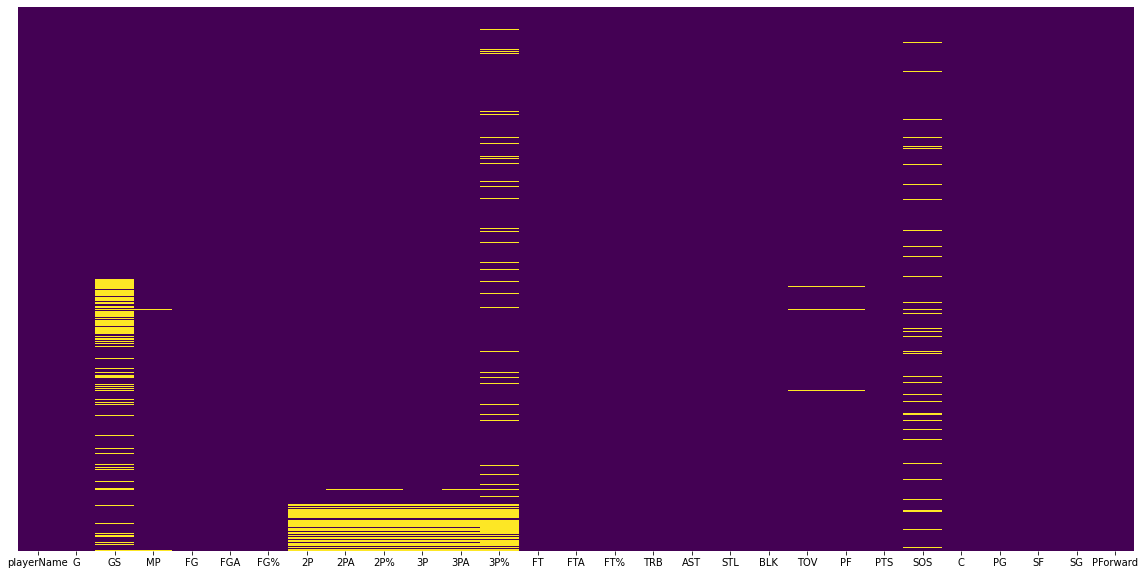

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Only use players that started in more than 10 college games as the stats will be normalized

<AxesSubplot:>

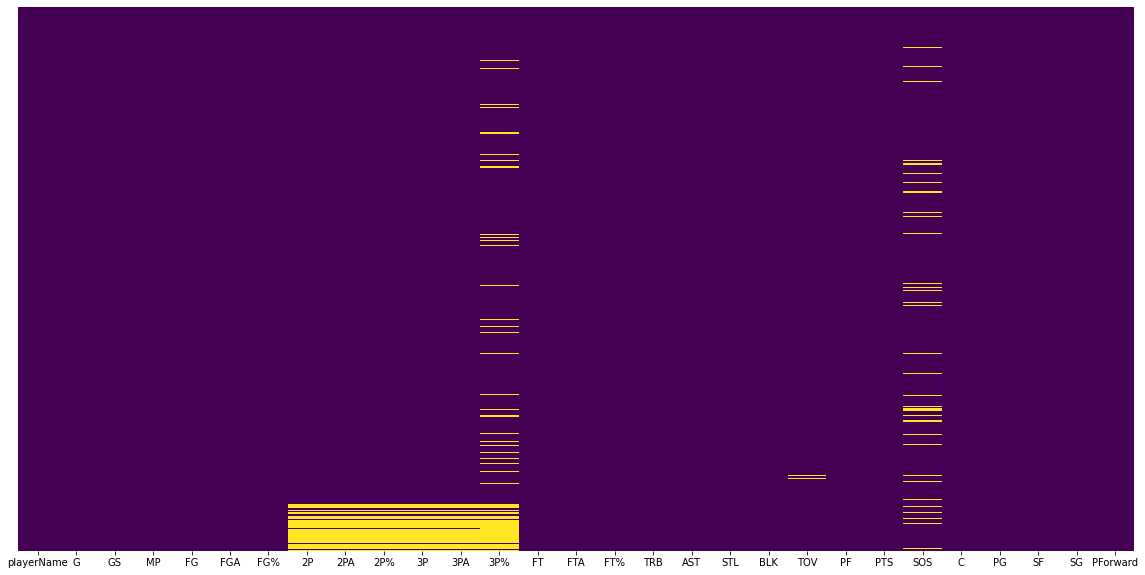

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df[df['GS'] >= 10].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
college_plus_nba = college_plus_nba[college_plus_nba['GS'] >= 10]

In [72]:
college_plus_nba.drop(['DRB', 'ORB', 'SOS'], axis = 1, inplace= True)

<AxesSubplot:>

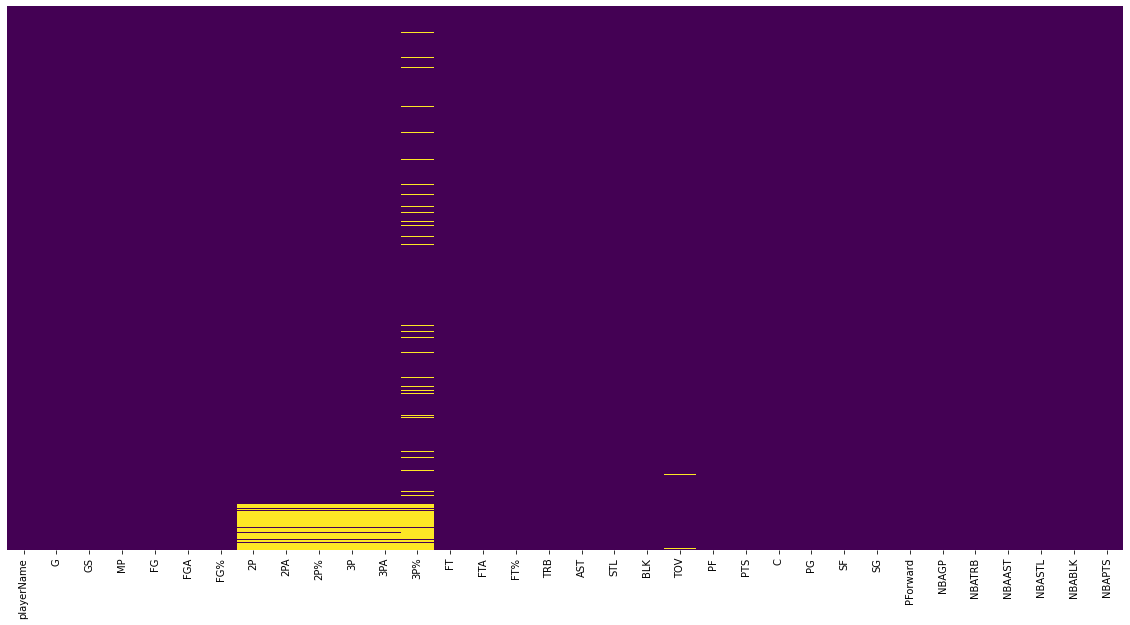

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(college_plus_nba.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [74]:
def fillmissing3Percent(columns):
    SM = columns[0]
    SA = columns[1]
    percent = columns[2]
    if pd.isnull(percent) and pd.notnull(SM) and pd.notnull(SA):
        if SA > 0:
            percent = SM / SA
        else:
            percent = 0
    
    return percent



In [75]:
# import math
# def loglabels(x):
#     if x >= 1:
#         return math.log10(x)
#     return x


In [76]:
college_plus_nba['3P%'] = college_plus_nba[['3P','3PA', '3P%']].apply(fillmissing3Percent,axis=1)

<AxesSubplot:>

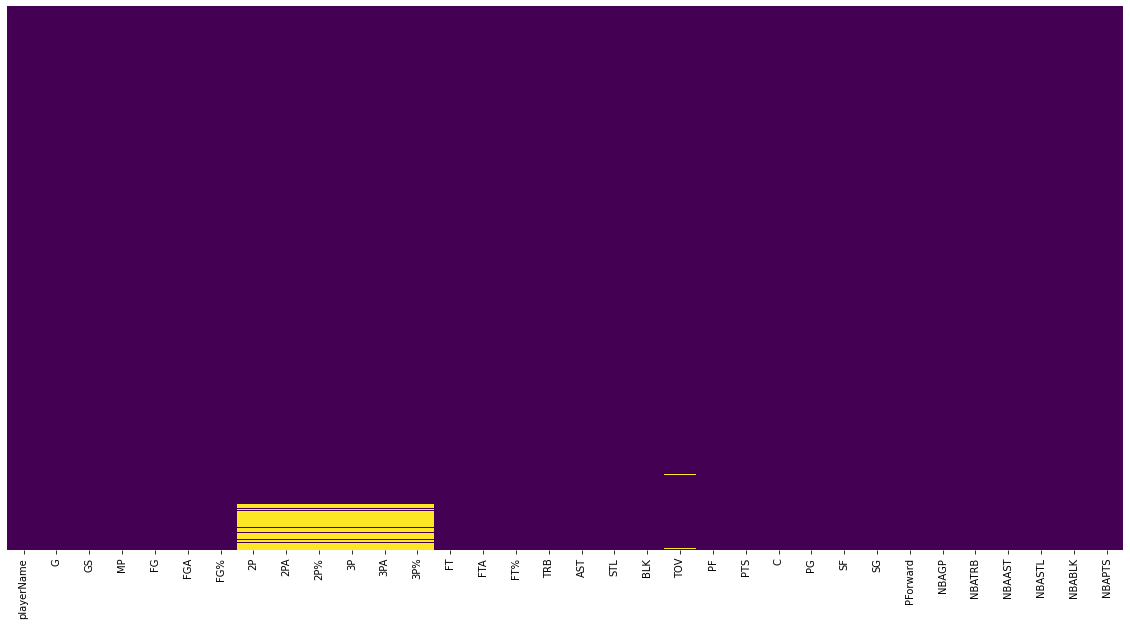

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(college_plus_nba.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### By dropping the remaining rows with missing data, we only lose ~ 7% of data. Which is okay for this analysis

In [78]:
college_plus_nba.dropna(inplace=True)

<AxesSubplot:>

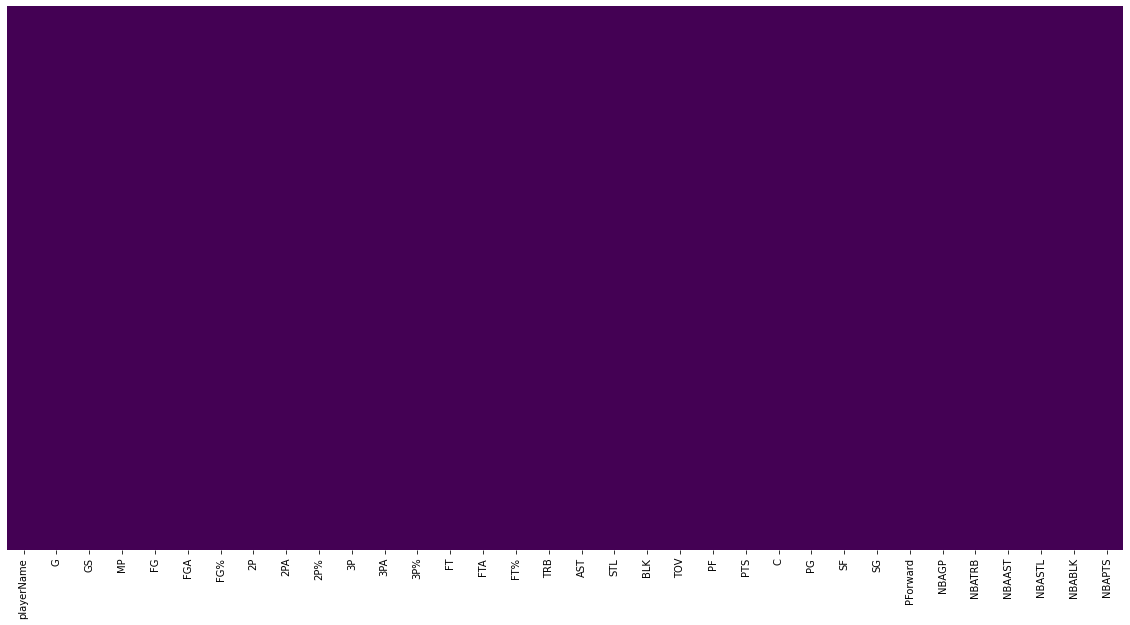

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(college_plus_nba.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
college_plus_nba.describe()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,PG,SF,SG,PForward,NBAGP,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,...,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,94.707665,67.666667,29.145187,5.001961,10.220499,0.494328,4.197594,7.979055,0.525605,0.899643,...,0.206774,0.181818,0.238859,0.214795,49.073084,2.624510,1.298485,0.517825,0.323262,5.831640
std,34.672395,31.576950,4.565819,1.380279,2.919852,0.056858,1.514969,2.737397,0.055687,0.829496,...,0.405172,0.385867,0.426577,0.410863,25.065694,1.939485,1.430148,0.399223,0.392484,4.309743
min,12.000000,10.000000,12.200000,1.700000,3.100000,0.360000,0.600000,1.200000,0.374000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,37.000000,26.400000,4.000000,8.200000,0.450000,3.100000,5.900000,0.492000,0.100000,...,0.000000,0.000000,0.000000,0.000000,28.000000,1.200000,0.400000,0.200000,0.100000,2.700000
50%,101.000000,64.500000,29.700000,5.000000,10.100000,0.485500,4.000000,7.700000,0.522000,0.800000,...,0.000000,0.000000,0.000000,0.000000,52.000000,2.100000,0.800000,0.400000,0.200000,4.600000
75%,126.000000,92.000000,32.500000,5.800000,12.100000,0.534000,5.200000,9.700000,0.556000,1.500000,...,0.000000,0.000000,0.000000,0.000000,72.000000,3.500000,1.675000,0.700000,0.400000,7.900000
max,152.000000,147.000000,38.600000,10.200000,20.700000,0.692000,9.700000,17.900000,1.389000,4.000000,...,1.000000,1.000000,1.000000,1.000000,82.000000,12.300000,10.600000,2.500000,3.500000,23.500000


In [81]:
df = college_plus_nba.drop(['NBAGP', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'], axis = 1)
rookie_data = college_plus_nba[['NBAGP', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS']]

#### From the boxplots below, it looks like the data is in different scales (i.e G has values between 12 - 152 and 2P has values between .6 - 9.7). These features may need to be scaled for certain models as the higher scaled values could heavily influence the predicted values.

<AxesSubplot:>

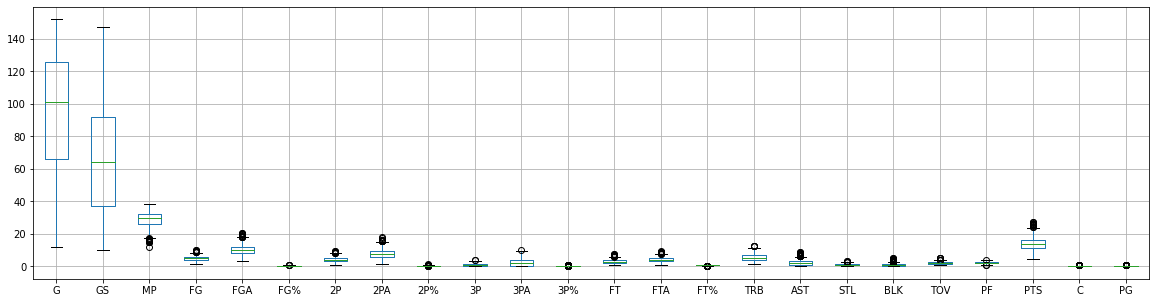

In [82]:
plt.figure(figsize=(20,5))
college_plus_nba.iloc[:,:25].boxplot()

<AxesSubplot:>

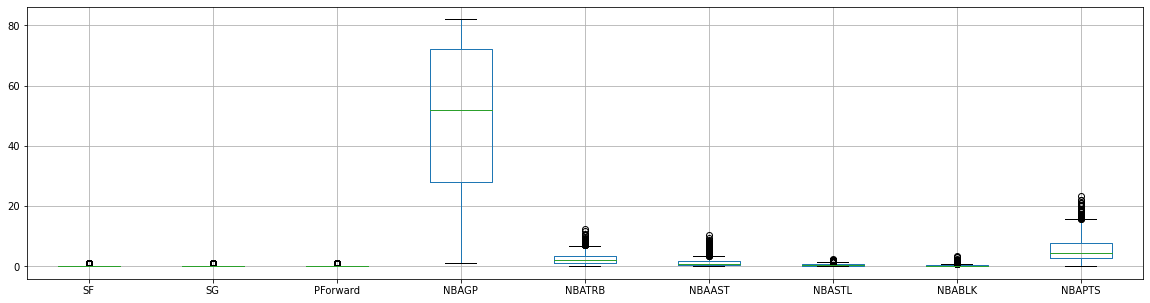

In [83]:
plt.figure(figsize=(20,5))
college_plus_nba.iloc[:,25:].boxplot()

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>],
       [<AxesSubplot:title={'center':'2P'}>,
        <AxesSubplot:title={'center':'2PA'}>,
        <AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'3P'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>],
       [<AxesSubplot:title={'center':'FT'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>,
        <AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'TOV'}>,
        <AxesSubplot:title={'center':'PF'}>,
        <AxesSubplot:title={'center':'PT

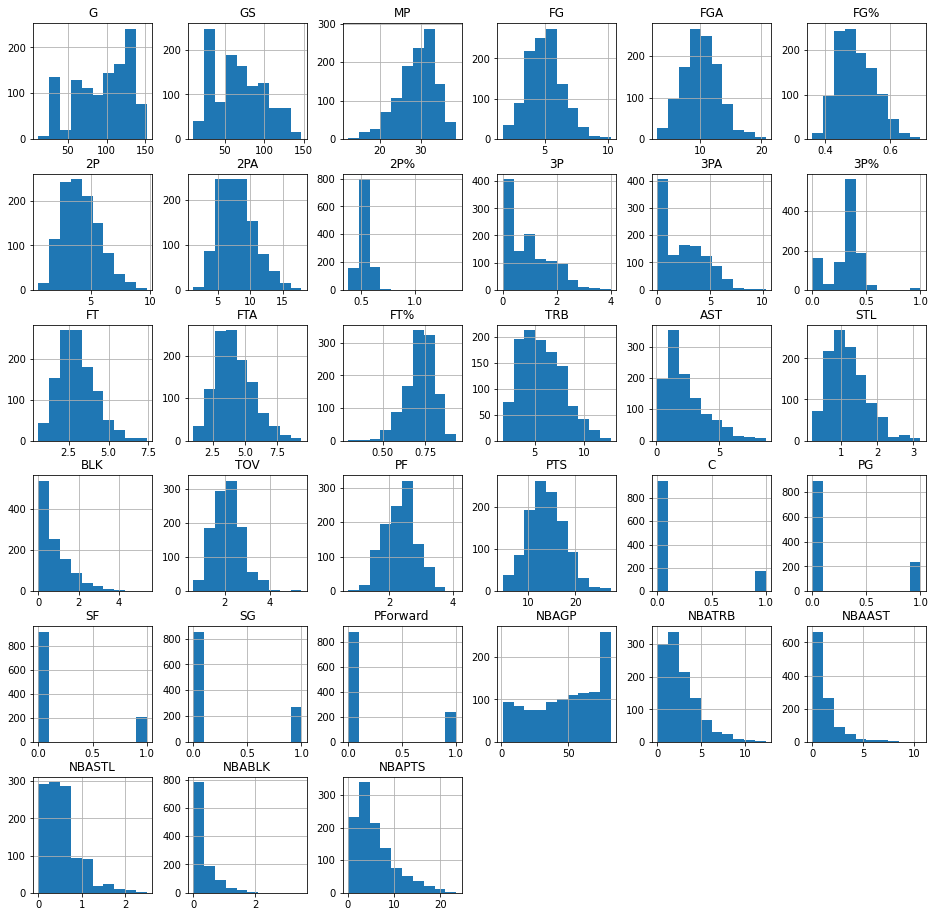

In [104]:
college_plus_nba.hist(figsize=(16, 16))

## Model 

#### Need to run the cell below twice since it produces an error the first time.

In [108]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#### All three models gave us similar results, however Random Forest is slightly better.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['playerName'],axis=1),rookie_data['NBAPTS'], test_size=0.3, random_state=101)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

rf = RandomForestRegressor(n_estimators=2000, random_state=101)
rf.fit(X_train, y_train)
predictions2 = rf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

ef = ExtraTreesRegressor(n_estimators=2000, random_state=101)
ef.fit(X_train, y_train)
predictions3 = ef.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE: 2.9914757705058657
MSE: 15.628068441336739
RMSE: 3.9532351866966806
MAE: 2.964152670623146
MSE: 15.37547572398367
RMSE: 3.9211574469770616
MAE: 3.012319732937687
MSE: 15.67744709634273
RMSE: 3.9594756087571406


In [87]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [88]:
rf2 = RandomForestRegressor(random_state=101)
rf_randomSearch = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_randomSearch.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [89]:
rf_randomSearch.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

#### Looks like the best RMSE we can get is 3.91 (for NBAPTS) using RandomeForestRegression. Not much better. Let's try make the labels more normally distributed and see if that works as all 5 labels are skewed.

In [91]:
predictions4 = rf_randomSearch.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions4))
print('MSE:', metrics.mean_squared_error(y_test, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

MAE: 2.9230697405915875
MSE: 15.297868249121322
RMSE: 3.9112489372477075


<AxesSubplot:>

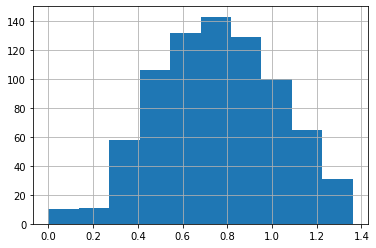

In [92]:
import math
def log10(val):
    return math.log10(val + 1)

normalPTStrain = y_train.apply(log10)
normalPTStest = y_test.apply(log10)
normalPTStrain.hist()

In [93]:
rf_randomSearch.fit(X_train, normalPTStrain)
predictions5 = rf_randomSearch.predict(X_test)
print('MAE:', metrics.mean_absolute_error(normalPTStest, predictions5))
print('MSE:', metrics.mean_squared_error(normalPTStest, predictions5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(normalPTStest, predictions5)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
MAE: 0.19029889091997532
MSE: 0.05962340692309927
RMSE: 0.24417904685516992


#### Looks like normalizing the labels produced similar - slightly worse results. This makes sense as tree models are invariant so scaling the data won't have an effect.

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, (10 ** predictions5) - 1))
print('MSE:', metrics.mean_squared_error(y_test, (10 ** predictions5) - 1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, (10 ** predictions5) - 1)))

MAE: 2.8203327940569354
MSE: 16.246855589203065
RMSE: 4.0307388391215655


#### Let's try to standarize all the features such that they have the same scale (i.e mean = 0 and variance = 1). The sklearn documentation says that if a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. Hence, it might be worth a try to see if that helps to improve the model

In [98]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [99]:
rf_randomSearch.fit(X_train_scaled, normalPTStrain)
predictions7 = rf_randomSearch.predict(X_test_scaled)
print('MAE:', metrics.mean_absolute_error(normalPTStest, predictions7))
print('MSE:', metrics.mean_squared_error(normalPTStest, predictions7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(normalPTStest, predictions7)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
MAE: 0.19039452181470448
MSE: 0.0596496160535591
RMSE: 0.24423270881181966


In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, (10 ** predictions7) - 1))
print('MSE:', metrics.mean_squared_error(y_test, (10 ** predictions7) - 1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, (10 ** predictions7) - 1)))

MAE: 2.821576124931467
MSE: 16.252366883842427
RMSE: 4.031422439269101


In [101]:
rf_randomSearch.fit(X_train_scaled, y_train)
predictions8 = rf_randomSearch.predict(X_test_scaled)
print('MAE:', metrics.mean_absolute_error(y_test, predictions8))
print('MSE:', metrics.mean_squared_error(y_test, predictions8))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions8)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
MAE: 2.9235851949978806
MSE: 15.301568200764693
RMSE: 3.911721897165581


In [107]:
lr.fit(X_train_scaled, normalPTStrain)
predictions = lr.predict(X_test_scaled)
print('MAE:', metrics.mean_absolute_error(normalPTStest, predictions))
print('MSE:', metrics.mean_squared_error(normalPTStest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(normalPTStest, predictions)))

MAE: 0.1926445175518479
MSE: 0.06071138806155084
RMSE: 0.24639681016918794


#### As seen above, it looks scaling the data did not work. Let's try scaling only the columns that somwhat normalized and apply transformations to those that skewed.

In [121]:
columns_to_scale = ['FG', 'FGA', 'FG%', '2P%', 'TOV', 'PF', 'PTS', 'C', 'PG', 'SF', 'SG', 'PForward']
columns_to_transform = list(set(df.columns) - set(columns_to_scale))


In [123]:
columns_to_transform.remove('playerName')

In [124]:
ss2 = StandardScaler()
ss2.fit(X_train[columns_to_scale])
X_train_scaled2 = pd.DataFrame(ss2.transform(X_train[columns_to_scale]), columns=columns_to_scale)
X_test_scaled2 = pd.DataFrame(ss2.transform(X_test[columns_to_scale]), columns=columns_to_scale)

In [132]:
X_train_scaled_transformed = pd.concat([X_train_scaled2, X_train_transform], axis = 1)
X_test_scaled_transformed = pd.concat([X_test_scaled2, X_test_transform], axis = 1)


#### This is what the data looks like after being transformed and scaled. Some columns are still skewed, but overall the dataset looks better

array([[<AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>,
        <AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'TOV'}>],
       [<AxesSubplot:title={'center':'PF'}>,
        <AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'SF'}>],
       [<AxesSubplot:title={'center':'SG'}>,
        <AxesSubplot:title={'center':'PForward'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'2P'}>,
        <AxesSubplot:title={'center':'3P%'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'FT%'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'GS'}>],
       [<AxesSubplot:title={'center':'2PA'}>,
        <AxesSubplot:title={'center'

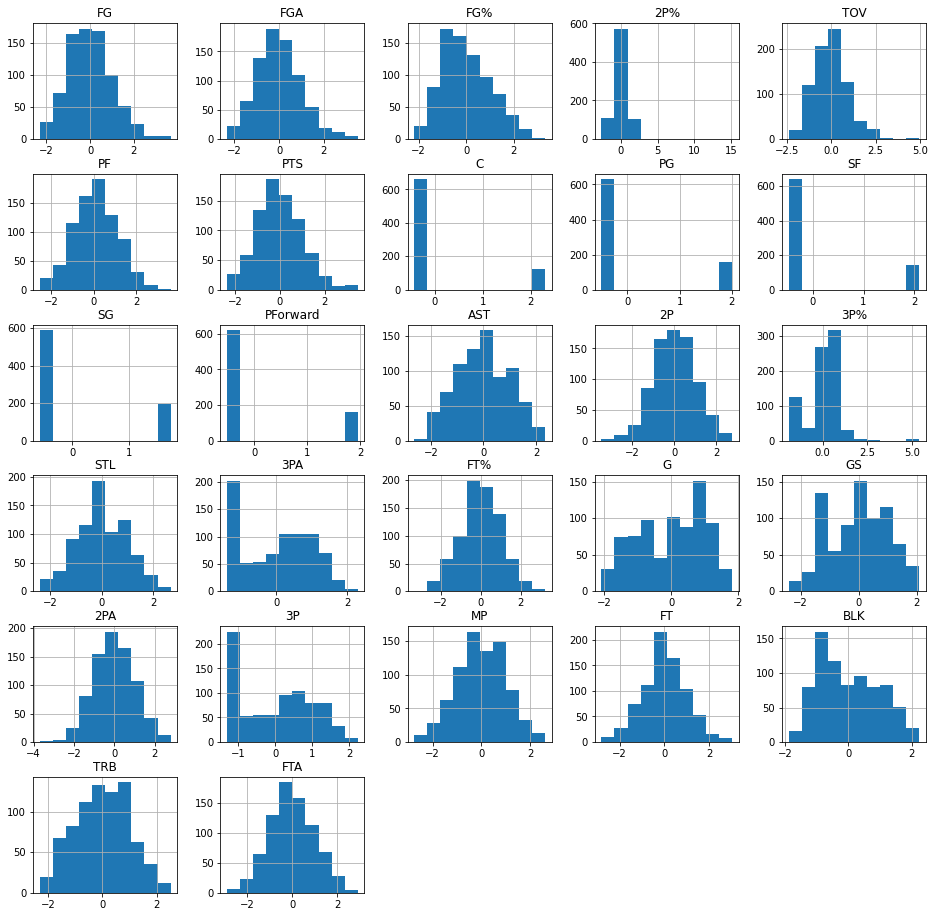

In [135]:
X_train_scaled_transformed.hist(figsize=(16,16))

In [136]:
lr.fit(X_train_scaled_transformed, normalPTStrain)
predictions = lr.predict(X_test_scaled_transformed)
print('MAE:', metrics.mean_absolute_error(normalPTStest, predictions))
print('MSE:', metrics.mean_squared_error(normalPTStest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(normalPTStest, predictions)))

MAE: 0.1913374407963363
MSE: 0.059534245094811145
RMSE: 0.24399640385630922


In [137]:
rf_randomSearch.fit(X_train_scaled_transformed, normalPTStrain)
predictions10 = rf_randomSearch.predict(X_test_scaled_transformed)
print('MAE:', metrics.mean_absolute_error(normalPTStest, predictions10))
print('MSE:', metrics.mean_squared_error(normalPTStest, predictions10))
print('RMSE:', np.sqrt(metrics.mean_squared_error(normalPTStest, predictions10)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
MAE: 0.19059894905907138
MSE: 0.06004608019115094
RMSE: 0.24504301702180975


In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, (10 ** predictions10) - 1))
print('MSE:', metrics.mean_squared_error(y_test, (10 ** predictions10) - 1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, (10 ** predictions10) - 1)))

MAE: 2.825727413945973
MSE: 16.33407172034223
RMSE: 4.041543234996037


#### Looks that experiment did not work either. This might be result we can get from the data available. From this analysis, it's apparent that college stats alone aren't indicative of how a player might perform in their rookie season in the NBA.

#### Time to predict the stats for the 2019 NBA class.

## Results

In [159]:
df_2019 = pd.read_csv('toppick2019_records3.csv')

In [160]:
df_2019.drop(['Unnamed: 0', 'playerName', 'School', 'Conf'], axis = 1, inplace=True)

In [161]:
df_2019.drop(['dummy', 'SOS'], axis=1, inplace=True)
df_2019

,Pos,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,33,33,30.0,9.0,13.2,0.680,8.2,11.0,0.747,...,0.640,3.5,5.4,8.9,2.1,2.1,1.8,2.4,2.1,22.6
1,PG,65,65,35.3,6.1,12.6,0.485,4.8,8.9,0.545,...,0.810,1.5,4.6,6.1,8.2,1.4,0.6,3.8,1.7,18.7
2,SG,38,38,35.3,8.4,18.5,0.454,6.5,12.2,0.529,...,0.665,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6
3,SF,71,38,26.6,4.4,8.5,0.509,3.4,6.3,0.541,...,0.773,1.3,3.1,4.4,1.6,0.6,0.5,1.2,1.9,12.4
4,PG,5,5,27.8,5.8,10.8,0.537,3.6,6.2,0.581,...,0.750,0.4,3.4,3.8,2.6,0.8,0.4,3.0,1.4,16.2
5,SG,75,58,29.5,5.3,11.6,0.459,3.9,7.5,0.522,...,0.687,1.2,4.4,5.6,2.8,1.3,0.6,2.1,2.0,14.9
6,SG,35,35,28.5,5.4,12.7,0.423,3.0,6.1,0.500,...,0.800,0.3,3.2,3.5,4.1,1.1,0.3,2.7,1.9,16.1
7,C,32,21,23.3,3.8,5.3,0.728,3.8,5.3,0.728,...,0.740,1.8,3.3,5.0,0.3,0.6,2.2,0.9,3.3,10.0
8,PF,102,39,19.7,4.5,7.8,0.579,4.3,7.1,0.607,...,0.746,1.1,3.3,4.4,0.8,0.6,0.5,1.2,1.6,12.1
9,SF,36,35,29.7,4.3,12.0,0.356,1.8,4.6,0.394,...,0.772,0.6,3.1,3.7,1.9,1.6,0.6,2.7,2.4,13.5


In [162]:
pos = pd.get_dummies(df_2019['Pos'])
pos['PForward'] = pos['PF']


In [163]:
df_2019 = pd.concat([df_2019,pos], axis=1)

In [168]:
df_2019.columns = ['Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P',
       '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'C', 'PFdrop', 'PG', 'SF', 'SG', 'PForward']
df_2019.drop(['Pos','PFdrop'], axis = 1, inplace=True)

In [171]:
df_2019 = df_2019[X_train.columns]

In [172]:
df_2019

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,STL,BLK,TOV,PF,PTS,C,PG,SF,SG,PForward
0,33,33,30.0,9.0,13.2,0.680,8.2,11.0,0.747,0.7,...,2.1,1.8,2.4,2.1,22.6,0,0,0,0,1
1,65,65,35.3,6.1,12.6,0.485,4.8,8.9,0.545,1.3,...,1.4,0.6,3.8,1.7,18.7,0,1,0,0,0
2,38,38,35.3,8.4,18.5,0.454,6.5,12.2,0.529,1.9,...,0.9,0.4,3.2,1.8,22.6,0,0,0,1,0
3,71,38,26.6,4.4,8.5,0.509,3.4,6.3,0.541,0.9,...,0.6,0.5,1.2,1.9,12.4,0,0,1,0,0
4,5,5,27.8,5.8,10.8,0.537,3.6,6.2,0.581,2.2,...,0.8,0.4,3.0,1.4,16.2,0,1,0,0,0
5,75,58,29.5,5.3,11.6,0.459,3.9,7.5,0.522,1.4,...,1.3,0.6,2.1,2.0,14.9,0,0,0,1,0
6,35,35,28.5,5.4,12.7,0.423,3.0,6.1,0.500,2.3,...,1.1,0.3,2.7,1.9,16.1,0,0,0,1,0
7,32,21,23.3,3.8,5.3,0.728,3.8,5.3,0.728,0.0,...,0.6,2.2,0.9,3.3,10.0,1,0,0,0,0
8,102,39,19.7,4.5,7.8,0.579,4.3,7.1,0.607,0.2,...,0.6,0.5,1.2,1.6,12.1,0,0,0,0,1
9,36,35,29.7,4.3,12.0,0.356,1.8,4.6,0.394,2.5,...,1.6,0.6,2.7,2.4,13.5,0,0,1,0,0


<AxesSubplot:>

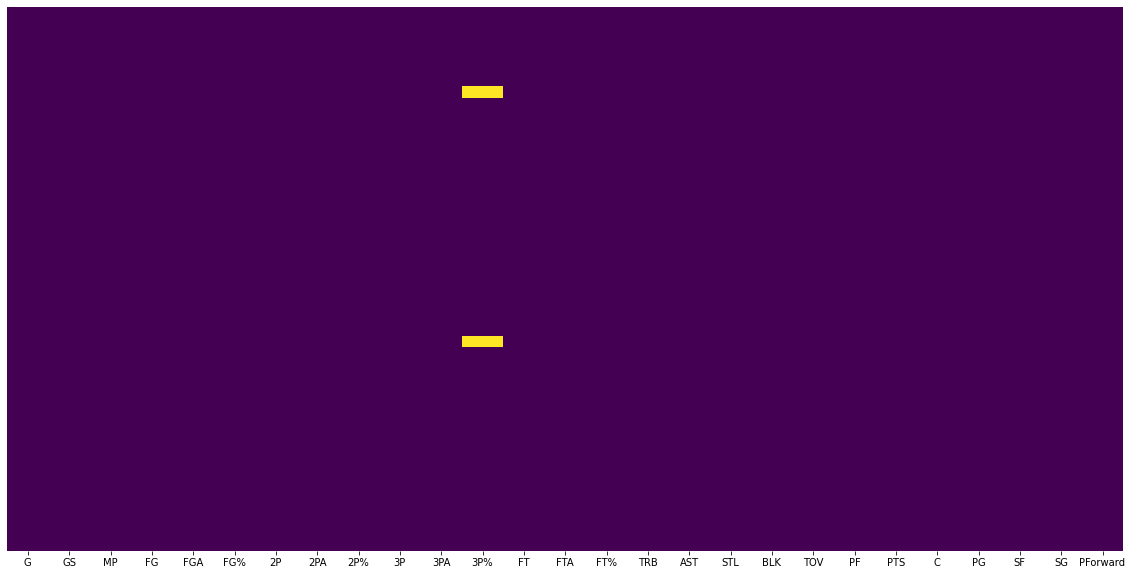

In [175]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2019.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [176]:
df_2019['3P%'] = df_2019[['3P','3PA', '3P%']].apply(fillmissing3Percent,axis=1)

<AxesSubplot:>

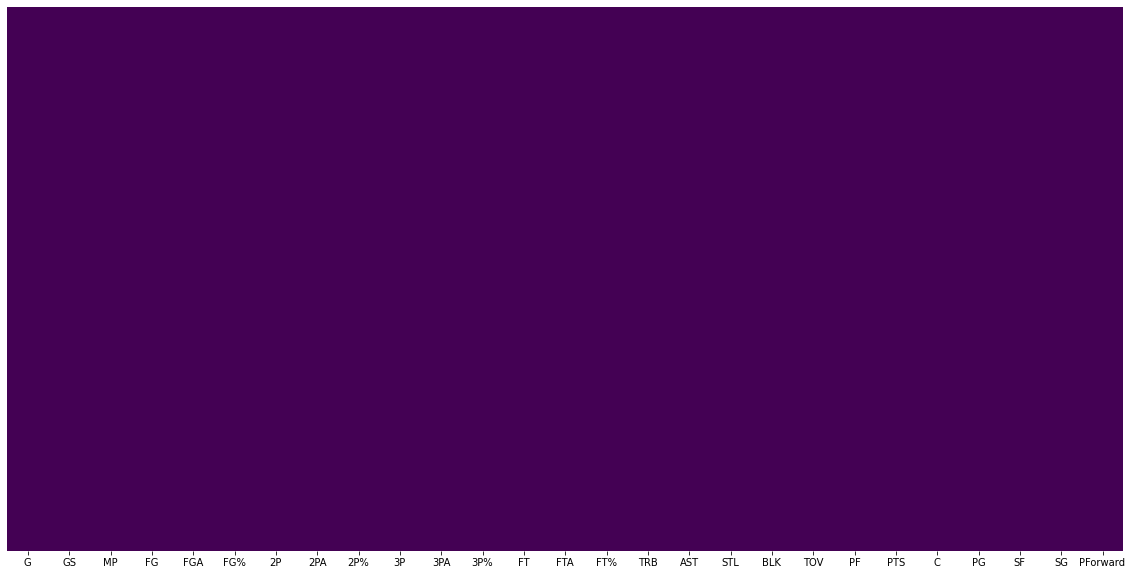

In [177]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2019.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Just use the raw data points as scaling/transforming did not help performance.

#### Using the entire dataset to train model as now we are predicting on a dataset with no labels.

In [181]:
rf_randomSearch.fit(df.drop(['playerName'], axis = 1), rookie_data['NBAPTS'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [182]:
NBAPTS_pred = rf_randomSearch.predict(df_2019)

In [183]:
NBAPTS_pred

array([10.9742954 ,  8.5931107 , 10.75679903,  6.17316847,  7.32112728,
        6.16151347,  6.60202179,  6.31856602,  6.5166959 ,  4.86164808,
        6.08909468,  5.05592974,  6.51648671,  7.14977911,  5.23737917,
        3.65995801,  8.98525248,  6.47141678,  3.4173144 ,  5.61762161,
        5.31783063,  4.18217441,  5.29093697,  4.3469378 ,  4.7850214 ,
        4.51148141,  6.26660013,  4.66715679,  6.63760385,  6.93937418,
        5.77442829,  5.10851055,  4.54541909,  6.2005656 ,  3.96042102,
        4.93031159,  6.74168732,  5.06053281,  5.96683749,  5.86521953,
        5.83813671,  5.09799734,  6.82145636,  8.00236778,  3.98392457,
        4.65446818,  5.08166267,  4.00919348])

In [186]:
rookie_data.columns

Index(['NBAGP', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'], dtype='object')

In [187]:
rf_randomSearch2 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_randomSearch2.fit(df.drop(['playerName'], axis = 1), rookie_data['NBATRB'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [188]:
rf_randomSearch3 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_randomSearch3.fit(df.drop(['playerName'], axis = 1), rookie_data['NBAAST'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [189]:
rf_randomSearch4 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_randomSearch4.fit(df.drop(['playerName'], axis = 1), rookie_data['NBASTL'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [190]:
rf_randomSearch5 = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_randomSearch5.fit(df.drop(['playerName'], axis = 1), rookie_data['NBABLK'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=101),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [192]:
NBATRB_pred = rf_randomSearch2.predict(df_2019)

In [193]:
NBAAST_pred = rf_randomSearch3.predict(df_2019)

In [194]:
NBASTL_pred = rf_randomSearch4.predict(df_2019)

In [195]:
NBABLK_pred = rf_randomSearch5.predict(df_2019)

In [204]:
final_stats = pd.DataFrame([df_2019_2['playerName'], NBAPTS_pred, NBAAST_pred, NBATRB_pred, NBASTL_pred, NBABLK_pred]).T
final_stats.columns = ['playerName', 'NBA PTS', 'NBA AST', 'NBA TRB', 'NBA STL', 'NBA BLK']


In [206]:
final_stats.to_csv('predictions.csv')

#### The results do make sense from an eye test. Zion averaging about 10 PTS seems accurate and so does Ja Morant having the highest AST average.


#### Edit in 2021: BOY WAS I WRONG!

In [207]:
final_stats

,playerName,NBA PTS,NBA AST,NBA TRB,NBA STL,NBA BLK
0,Zion Williamson,10.974295,1.616501,4.515707,0.894583,0.833198
1,Ja Morant,8.593111,3.693834,2.542171,0.881005,0.214561
2,RJ Barrett,10.756799,2.52318,2.63239,0.672529,0.196095
3,De'Andre Hunter,6.173168,0.910059,2.281714,0.474883,0.233674
4,Darius Garland,7.321127,2.346,2.464285,0.626963,0.235712
5,Jarrett Culver,6.161513,0.962269,2.001988,0.503328,0.172061
6,Coby White,6.602022,1.663576,1.479359,0.459464,0.129941
7,Jaxson Hayes,6.318566,0.732051,3.637561,0.423096,1.148755
8,Rui Hachimura,6.516696,0.748267,2.948048,0.402157,0.299514
9,Cam Reddish,4.861648,1.472434,1.648001,0.59373,0.169826
